In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic-machine-learning-from-disaster/gender_submission.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv
/kaggle/input/titanic-machine-learning-from-disaster/train.csv


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# for regression problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# to split and standarize the datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate regression models
from sklearn.metrics import mean_squared_error

# to evaluate classification models
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv('../input/titanic-machine-learning-from-disaster/train.csv', usecols = ['Age', 'Fare','Survived'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
data.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [10]:
def impute_na(df, variable, median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_zero'] = df[variable].fillna(0)

In [11]:
median = X_train.Age.median()
median

29.0

In [12]:
impute_na(X_train, 'Age', median)
X_train.head(15)

,Survived,Age,Fare,Age_median,Age_zero
857,1,51.0,26.5500,51.0,51.0
52,1,49.0,76.7292,49.0,49.0
386,0,1.0,46.9000,1.0,1.0
124,0,54.0,77.2875,54.0,54.0
578,0,NaN,14.4583,29.0,0.0
549,1,8.0,36.7500,8.0,8.0
118,0,24.0,247.5208,24.0,24.0
12,0,20.0,8.0500,20.0,20.0
157,0,30.0,8.0500,30.0,30.0
127,1,24.0,7.1417,24.0,24.0


In [13]:
impute_na(X_test, 'Age', median)

In [14]:
# we can see a change in the variance after imputation

print('Original Variance: ', X_train['Age'].std())
print('Variance after median imputation: ', X_train['Age_median'].std())

Original Variance:  14.506993804588443
Variance after median imputation:  13.024746215318798


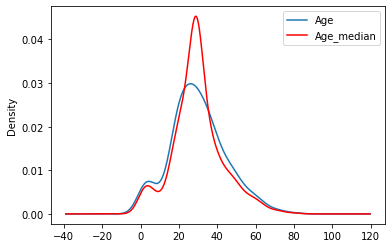

In [15]:
# we can see that the distribution has changed slightly with now more values accumulating towards the median
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

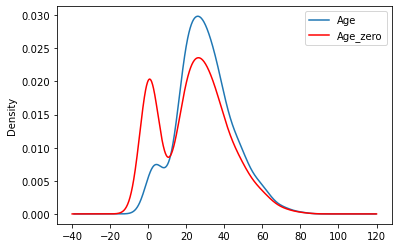

In [16]:
# filling NA with zeroes creates a peak of population around 0, as expected
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['Age'].plot(kind='kde', ax=ax)
X_train.Age_zero.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [17]:
# Let's compare the performance of Logistic Regression using Age filled with zeros or alternatively the median

# model on NA imputed with zeroes
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = logit.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = logit.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

# model on NA imputed with median
logit = LogisticRegression(random_state=44, C=1000) # c big to avoid regularization
logit.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = logit.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = logit.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

Train set zero imputation
Logistic Regression roc-auc: 0.6863354374091668
Test set zero imputation
Logistic Regression roc-auc: 0.71375

Train set median imputation
Logistic Regression roc-auc: 0.6794863451985858
Test set median imputation
Logistic Regression roc-auc: 0.7244940476190477


In [18]:
print('Average total survival:', X_train.Survived.mean())

Average total survival: 0.3884430176565008


In [19]:
print('Average real survival of children: ', X_train[X_train.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes: ', X_train[X_train.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with median: ', X_train[X_train.Age_median<15].Survived.mean())

Average real survival of children:  0.5740740740740741
Average survival of children when using Age imputed with zeroes:  0.38857142857142857
Average survival of children when using Age imputed with median:  0.5740740740740741


In [20]:
# Let's compare the performance of SVM using Age filled with zeros or alternatively the median

SVM_model = SVC(random_state=44, probability=True, max_iter=-1, kernel='linear',)
SVM_model.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = SVM_model.predict_proba(X_train[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = SVM_model.predict_proba(X_test[['Age_zero', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
SVM_model = SVC(random_state=44, probability=True,  max_iter=-1, kernel='linear')
SVM_model.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = SVM_model.predict_proba(X_train[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = SVM_model.predict_proba(X_test[['Age_median', 'Fare']])
print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

Train set zero imputation
Logistic Regression roc-auc: 0.6879514544153056
Test set zero imputation
Logistic Regression roc-auc: 0.7243452380952381

Train set median imputation
Logistic Regression roc-auc: 0.6931248779852932
Test set median imputation
Logistic Regression roc-auc: 0.7417559523809524



In [21]:
# Let's compare the performance of Random Forests using Age filled with zeros or alternatively the median

rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_zero', 'Fare']], y_train)
print('Train set zero imputation')
pred = rf.predict_proba(X_train[['Age_zero', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set zero imputation')
pred = rf.predict_proba(X_test[['Age_zero', 'Fare']])
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()
rf = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf.fit(X_train[['Age_median', 'Fare']], y_train)
print('Train set median imputation')
pred = rf.predict_proba(X_train[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
print('Test set median imputation')
pred = rf.predict_proba(X_test[['Age_median', 'Fare']])
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049

